<a href="https://colab.research.google.com/github/Afrah333333/deep-learning/blob/main/custom_data_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

going_modular

In [ ]:
#Getting our data
import os
import requests
import zipfile
from pathlib import Path

data_path = Path('../content')
image_path = data_path / 'taco_hotdog_icecream'

#if directory doesnot exist make one

# if image_path.is_dir():
#   print(f'{image_path} directory exists')

# else:
#   print(f'{image_path} does not exist')
#   image_path.mkdir(parents=True,exist_ok=True)

# #download the data
# with open(data_path / 'taco_hotdog_icecream.zip','wb') as f:
#   request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/taco_hotdog_icecream_20_percent.zip")
#   print("Downloading taco_hotdog_icecream data...")
#   f.write(request.content)

with zipfile.ZipFile(data_path / "taco_hotdog_icecream_20_percent.zip", "r") as zip_ref:
    print("Unzipping taco,hotdog,icecream...")
    zip_ref.extractall(image_path)



Unzipping taco,hotdog,icecream...


In [ ]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('../content/taco_hotdog_icecream/train'),
 PosixPath('../content/taco_hotdog_icecream/test'))

Random image path: ../content/taco_hotdog_icecream/test/hot_dog/2393205.jpg
Image class: hot_dog
Image height: 512
Image width: 384


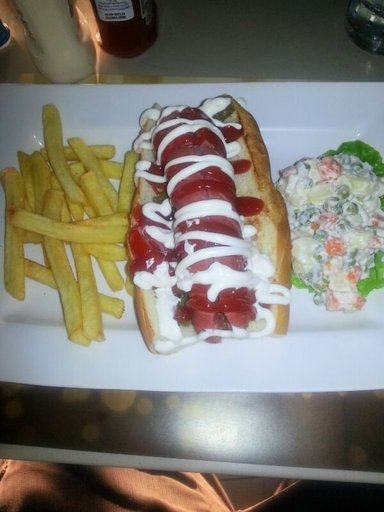

In [ ]:
import random
from PIL import Image

# Set seed
random.seed(42)

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
   transforms.RandomHorizontalFlip(p=0.5),# p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
     transforms.ToTensor()# this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0
])

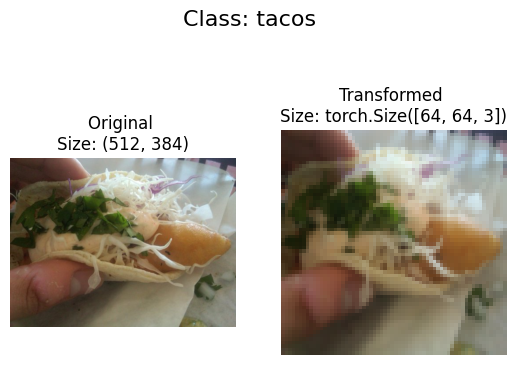

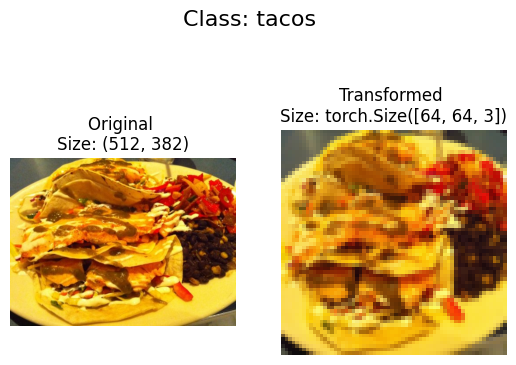

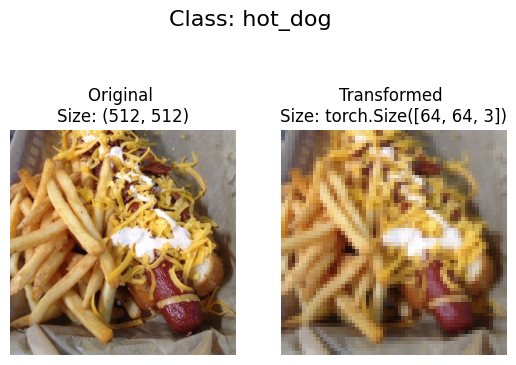

In [ ]:
import matplotlib.pyplot as plt

def plot_transformed_images(image_paths, transform, n=3, seed=15):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths.
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                         n=3)


In [ ]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 450
    Root location: ../content/taco_hotdog_icecream/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 150
    Root location: ../content/taco_hotdog_icecream/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [ ]:
class_names = train_data.classes
class_names

['hot_dog', 'ice_cream', 'tacos']

In [ ]:
class_idx = train_data.class_to_idx
class_idx

{'hot_dog': 0, 'ice_cream': 1, 'tacos': 2}

In [ ]:
img , lab = train_data[0][0] , train_data[0][1]
print(img.shape)

torch.Size([3, 64, 64])


In [ ]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=1, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=1,
                             num_workers=1,
                             shuffle=False) # don't usually need to shuffle testing data

train_dataloader, test_dataloader

In [ ]:
img_batch, lab_batch = next(iter(train_dataloader))
print(f"Image shape: {img_batch.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {lab_batch.shape}")

creating custom dataset(ImageFolder) from sratch

In [ ]:
import os
from typing import Tuple, Dict, List
def locate_classes(dir:str)-> Tuple[List[str], Dict[str, int]]:
  classes = sorted(entry.name for entry in os.scandir(dir) if entry.isdir())
  if not classes:
    raise FileNotFoundError(f'could not find classes in {dir}')

  class_to_idx = {classnm:i for i , classnm in enumerate(classes)}
  return classes , class_to_idx

In [ ]:
import pathlib
from torch.utils.data import Dataset
class ImageFoldetCustom(Dataset):
  def __init__(self,target_dir:str,transform=None)->None:
    self.paths = list(pathlib.Path(target_dir).glob('*/*/*.jpg'))
    self.transform = transform
    self.classes,self.class_to_idx = locate_classes(target_dir)

  def load_image(self, index: int) -> Image.Image:
    img_path=self.paths[index]

    return Image.open(img_path)

  def __len__(self)->int:
    return len(self.paths)

  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:#requied for subclassing
    img = self.load_image(index)
    class_name = self.paths[index].parent.stem
    class_id = class_to_idx[class_name]

    if self.transform:
      return self.transform(img) , class_id# return data, label (X, y)

    else:
      return img,class_id# return data, label (X, y)



In [ ]:
# Augment train data
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

# Don't augment test data, only reshape
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [ ]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transforms)
train_data_custom, test_data_custom

In [ ]:
len(train_data_custom), len(test_data_custom)

In [ ]:
train_data_custom.classes

In [ ]:
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):

    # 2. Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")

    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
         if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

In [ ]:
# Display random images from ImageFolder created Dataset
display_random_images(train_data,
                      n=5,
                      classes=class_names,
                      seed=None)

In [ ]:
# Display random images from ImageFolderCustom Dataset
display_random_images(train_data_custom,
                      n=12,
                      classes=class_names,
                      seed=None)

In [ ]:
# Turn train and test custom Dataset's into DataLoader's
from torch.utils.data import DataLoader
train_dataloader_custom = DataLoader(dataset=train_data_custom, # use custom created train Dataset
                                     batch_size=1, # how many samples per batch?
                                     num_workers=0, # how many subprocesses to use for data loading? (higher = more)
                                     shuffle=True) # shuffle the data?

test_dataloader_custom = DataLoader(dataset=test_data_custom, # use custom created test Dataset
                                    batch_size=1,
                                    num_workers=0,
                                    shuffle=False) # don't usually need to shuffle testing data

train_dataloader_custom, test_dataloader_custom

In [ ]:
#exploring other data augument techniques
# TrivialAugment is when you have a set of transforms and you randomly pick a number of them to perform on an
#image and at a random magnitude between a given range (a higher magnitude means more instense).
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31), # how intense 0,low - 31 highest
    transforms.ToTensor() # use ToTensor() last to get everything between 0 & 1
])

# Don't need to perform augmentation on the test data
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [ ]:
# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# Plot random images
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transforms,
    n=3,
    seed=None
)